# Project: Extreme Absenteeism Predictive Analysis

## Table of Content
* [Introduction](#introduction)
* [Load and Clean Data](#load-and-clean-data) 
* [Feature Engineering](#feature-engineering)
* [Model Building](../scripts/machine_learning.ipynb)
* [Module](../data/absenteeism_module.py)

## Introduction
* This project tries to predict extreme absenteeism in a company using logistic regression techniques. A [model](../scripts/machine_learning.ipynb) was built after data processing with an accuracy of 75%. Next, the model was [modularized](../data/absenteeism_module.py) to allow easy usage in new [data](../data/Absenteeism_new_data.csv). 
* Next, the [new data](../data/absenteeism_exercise_integration.ipynb) was integrated to mysql to create the [db file](db.sql) after which it was sent to [tableau](../data/Tableau%20Visualization.twb) for visualization and finally creating a dashboard. A description of the columns is as follows:
* `ID` is a unique identifier for each employee.
* `Reason for Absence` displays the reason for being absent as stated by each employee. Reason ranges from 1 - 28.
* `Date` is the day employee was absent from work.
* `Transportation Expense` is the cost of commuting to work for an employee.
* `Distance to work` indicates how far from the office the employee lives.
* `Age` ages of the employees.
* `Daily Work Load Average` average of workload on each employee.
* `Body Mass Index` BMI of each employee.
* `Eduation` contains four categories of educaional qualification. High School (1), Graduate (2), Post Graduate (3), Masters or doc (4).
* `Children` shows the number of children each employee has.
* `Pets` shows the number of Pets each employee has.
* `Absenteeism Time in Hours` shows how many hours an employee is absent from work at the particular date.


<a id='Load and Clean Data'></a>
## Load and Clean Data


In [1]:
# importing packages for this project
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns

In [2]:
# loading the file
raw_csv_data = pd.read_csv('../data/Absenteeism_data.csv')
raw_csv_data

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
695,17,10,23/05/2018,179,22,40,237.656,22,2,2,0,8
696,28,6,23/05/2018,225,26,28,237.656,24,1,1,2,3
697,18,10,24/05/2018,330,16,28,237.656,25,2,0,0,8
698,25,23,24/05/2018,235,16,32,237.656,25,3,0,0,2


In [3]:
""" To display all data rowsand columns
pd.options.display.max_columns = None
pd.options.display.max_rows = None """

' To display all data rowsand columns\npd.options.display.max_columns = None\npd.options.display.max_rows = None '

In [4]:
raw_csv_data.describe()

,ID,Reason for Absence,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,17.951429,19.411429,222.347143,29.892857,36.417143,271.801774,26.737143,1.282857,1.021429,0.687143,6.761429
std,11.028144,8.356292,66.312960,14.804446,6.379083,40.021804,4.254701,0.668090,1.112215,1.166095,12.670082
min,1.000000,0.000000,118.000000,5.000000,27.000000,205.917000,19.000000,1.000000,0.000000,0.000000,0.000000
25%,9.000000,13.000000,179.000000,16.000000,31.000000,241.476000,24.000000,1.000000,0.000000,0.000000,2.000000
50%,18.000000,23.000000,225.000000,26.000000,37.000000,264.249000,25.000000,1.000000,1.000000,0.000000,3.000000
75%,28.000000,27.000000,260.000000,50.000000,40.000000,294.217000,31.000000,1.000000,2.000000,1.000000,8.000000
max,36.000000,28.000000,388.000000,52.000000,58.000000,378.884000,38.000000,4.000000,4.000000,8.000000,120.000000


In [5]:
raw_csv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         700 non-null    int64  
 1   Reason for Absence         700 non-null    int64  
 2   Date                       700 non-null    object 
 3   Transportation Expense     700 non-null    int64  
 4   Distance to Work           700 non-null    int64  
 5   Age                        700 non-null    int64  
 6   Daily Work Load Average    700 non-null    float64
 7   Body Mass Index            700 non-null    int64  
 8   Education                  700 non-null    int64  
 9   Children                   700 non-null    int64  
 10  Pets                       700 non-null    int64  
 11  Absenteeism Time in Hours  700 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 65.8+ KB


In [6]:
raw_csv_data.isnull().sum()

ID                           0
Reason for Absence           0
Date                         0
Transportation Expense       0
Distance to Work             0
Age                          0
Daily Work Load Average      0
Body Mass Index              0
Education                    0
Children                     0
Pets                         0
Absenteeism Time in Hours    0
dtype: int64

In [7]:
# creating a copy before preprocessing
df = raw_csv_data.copy()

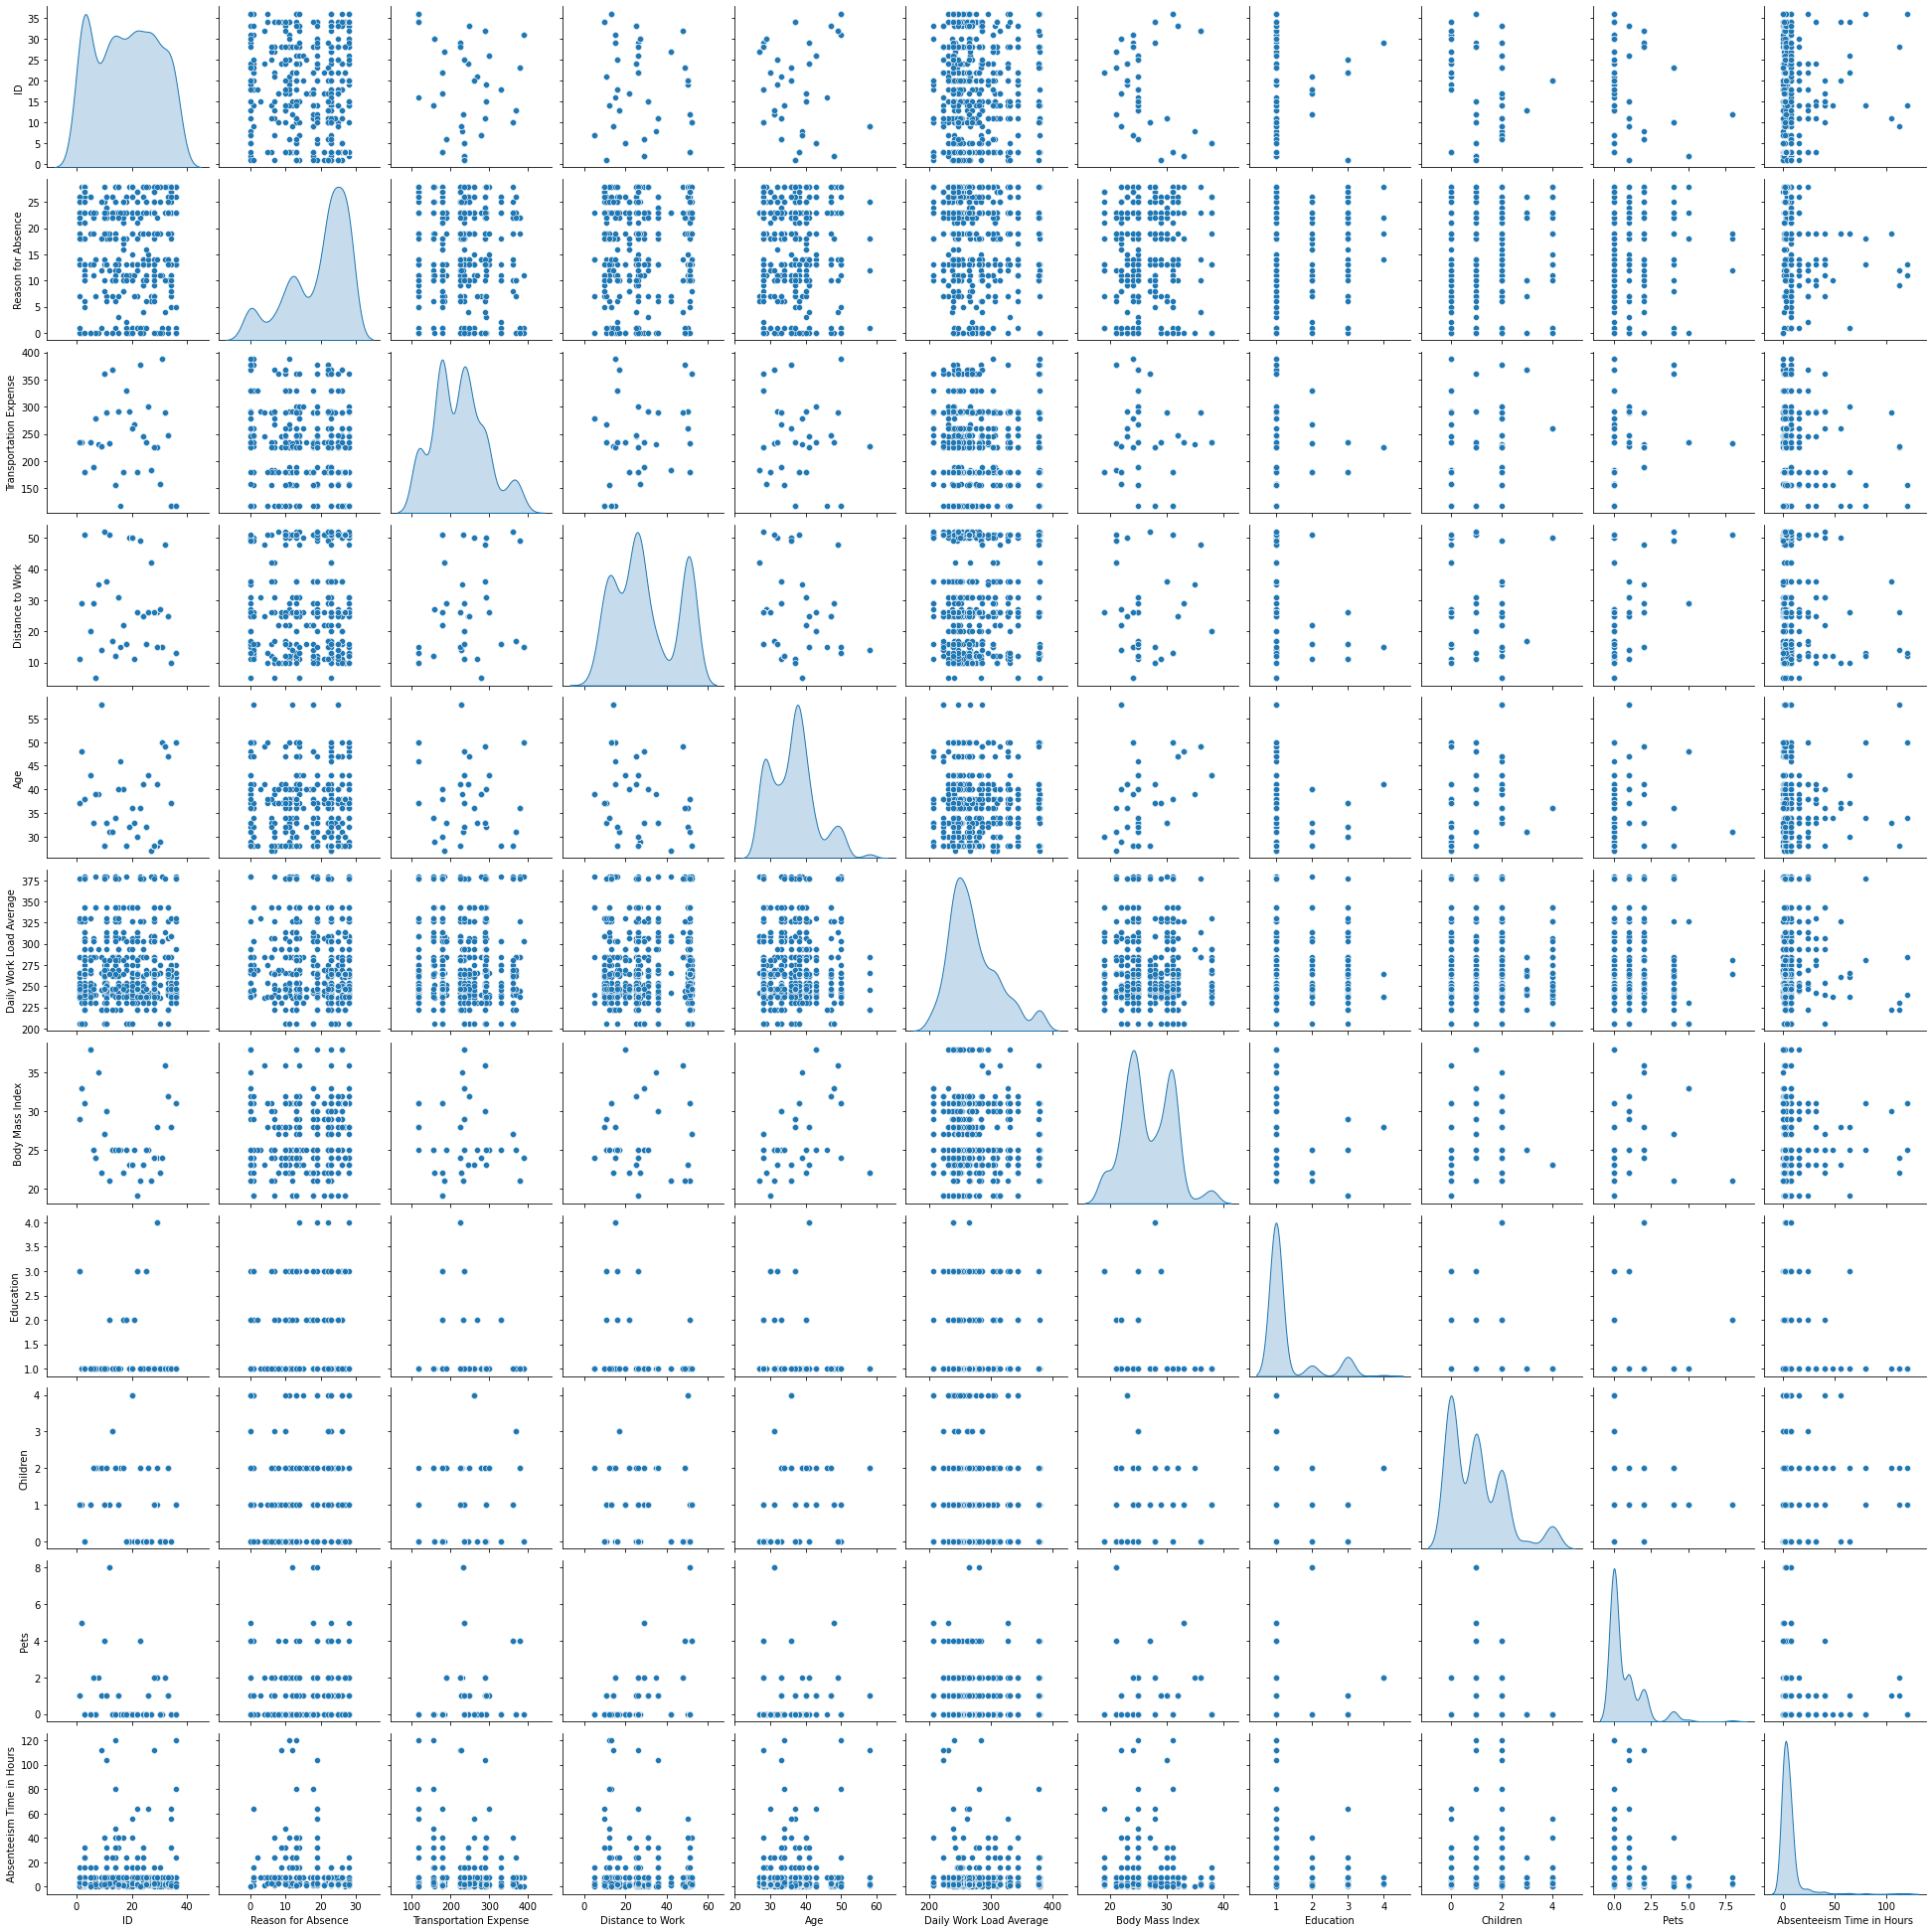

In [8]:
# EDA
sns.pairplot(data=df, diag_kind='kde')

In [9]:
# searching for correlation amongst columns
df.corr().style.background_gradient(cmap='coolwarm')

,ID,Reason for Absence,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
ID,1.000000,-0.079111,-0.203788,-0.493562,0.041367,0.092873,-0.320718,-0.032889,0.026095,0.005380,-0.005469
Reason for Absence,-0.079111,1.000000,-0.131790,0.160059,-0.055210,-0.130406,0.052741,-0.060083,-0.050053,-0.032872,-0.175826
Transportation Expense,-0.203788,-0.131790,1.000000,0.234940,-0.223828,0.006123,-0.140531,-0.054597,0.381749,0.446887,0.008342
Distance to Work,-0.493562,0.160059,0.234940,1.000000,-0.131076,-0.073683,0.136190,-0.282600,0.048534,0.171585,-0.080593
Age,0.041367,-0.055210,-0.223828,-0.131076,1.000000,-0.045452,0.483762,-0.209330,0.046930,-0.252067,0.035784
Daily Work Load Average,0.092873,-0.130406,0.006123,-0.073683,-0.045452,1.000000,-0.098430,-0.077012,0.032194,0.010490,0.029609
Body Mass Index,-0.320718,0.052741,-0.140531,0.136190,0.483762,-0.098430,1.000000,-0.348758,-0.155711,-0.066484,-0.040203
Education,-0.032889,-0.060083,-0.054597,-0.282600,-0.209330,-0.077012,-0.348758,1.000000,-0.179521,-0.080899,-0.035621
Children,0.026095,-0.050053,0.381749,0.048534,0.046930,0.032194,-0.155711,-0.179521,1.000000,0.116586,0.093661
Pets,0.005380,-0.032872,0.446887,0.171585,-0.252067,0.010490,-0.066484,-0.080899,0.116586,1.000000,-0.024522


In [10]:
# Removing irrelevant columns
df = df.drop(["ID"], axis = 1)

## Feature Engineering

<ul> we'll focus on re-engineering Reason for Absence, Date and Education columns </ul> 

In [11]:
#checking the minimum and maximum values of Reason for absence 
print(df['Reason for Absence'].max())
print(df['Reason for Absence'].min())

28
0


In [12]:
#checking the number of values in 'Reason for Absence' column
len(df['Reason for Absence'].unique()) 

28

In [13]:
# counting the unique values in 'Reason for Absence'
sorted(df['Reason for Absence'].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28]

These 28 reasons for absence represents an actual reason for absence. as shown in the supporting document. there we can see why 20 isn't amongst the reasons. We need to add numerical meaning to these categorical nominal values by creating dummy variables.
A dummy variable is an explanatory binary variable that equals:
1 if a certain categorical efect is present, and equals 0 if that same effect is absent.

In [14]:
# using .get_dummies to create dummy variable and to avoid multicollinearity issues we drop the first column which is 'zero reason' variable.
reason_columns = pd.get_dummies(df['Reason for Absence'], drop_first = True)
reason_columns

,1,2,3,4,5,6,7,8,9,10,...,18,19,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
696,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
697,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
698,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [15]:
#checking for rows with missing values
reason_columns['check'] = reason_columns.sum(axis=1)
reason_columns
# expect that each row has a check column value of 1, as an individual can't be absent for 2 reasons.

,1,2,3,4,5,6,7,8,9,10,...,19,21,22,23,24,25,26,27,28,check
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
696,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
697,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
698,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [16]:
# programmatically checking the check values 
reason_columns['check'].unique()

array([1, 0], dtype=int64)

In [17]:
# dropping the check column as it's confirmed our dummies
reason_columns = reason_columns.drop(['check'], axis = 1)

In [18]:
reason_columns.columns.values
reason_columns

,1,2,3,4,5,6,7,8,9,10,...,18,19,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
696,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
697,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
698,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [19]:
# grouping the reason for absence data
reason_type_1 = reason_columns.iloc[:, :14].max(axis=1)
reason_type_2 = reason_columns.iloc[:, 14:17].max(axis=1)
reason_type_3 = reason_columns.iloc[:, 17:20].max(axis=1)
reason_type_4 = reason_columns.iloc[:, 20:].max(axis=1)

In [20]:
# Concatenate Column Values
df = pd.concat([df, reason_type_1, reason_type_2, reason_type_3, reason_type_4], axis = 1)
df

,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,0,1,2,3
0,26,07/07/2015,289,36,33,239.554,30,1,2,1,4,0,0,0,1
1,0,14/07/2015,118,13,50,239.554,31,1,1,0,0,0,0,0,0
2,23,15/07/2015,179,51,38,239.554,31,1,0,0,2,0,0,0,1
3,7,16/07/2015,279,5,39,239.554,24,1,2,0,4,1,0,0,0
4,23,23/07/2015,289,36,33,239.554,30,1,2,1,2,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,10,23/05/2018,179,22,40,237.656,22,2,2,0,8,1,0,0,0
696,6,23/05/2018,225,26,28,237.656,24,1,1,2,3,1,0,0,0
697,10,24/05/2018,330,16,28,237.656,25,2,0,0,8,1,0,0,0
698,23,24/05/2018,235,16,32,237.656,25,3,0,0,2,0,0,0,1


In [21]:
df.columns.values

array(['Reason for Absence', 'Date', 'Transportation Expense',
       'Distance to Work', 'Age', 'Daily Work Load Average',
       'Body Mass Index', 'Education', 'Children', 'Pets',
       'Absenteeism Time in Hours', 0, 1, 2, 3], dtype=object)

In [22]:
# renaming the last concatenated columns
column_names = ['Reason for Absence', 'Date', 'Transportation Expense',
       'Distance to Work', 'Age', 'Daily Work Load Average',
       'Body Mass Index', 'Education', 'Children', 'Pets',
       'Absenteeism Time in Hours', 'Reason_1', 'Reason_2', 'Reason_3', 'Reason_4']

In [23]:
# adding the new column names to the original dataframe
df.columns = column_names
df.head()

,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Reason_1,Reason_2,Reason_3,Reason_4
0,26,07/07/2015,289,36,33,239.554,30,1,2,1,4,0,0,0,1
1,0,14/07/2015,118,13,50,239.554,31,1,1,0,0,0,0,0,0
2,23,15/07/2015,179,51,38,239.554,31,1,0,0,2,0,0,0,1
3,7,16/07/2015,279,5,39,239.554,24,1,2,0,4,1,0,0,0
4,23,23/07/2015,289,36,33,239.554,30,1,2,1,2,0,0,0,1


In [24]:
# drop original reason column
df = df.drop(['Reason for Absence'], axis = 1)

In [25]:
# Reorder Columns
column_names_rendered = ['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4','Date', 'Transportation Expense',
       'Distance to Work', 'Age', 'Daily Work Load Average',
       'Body Mass Index', 'Education', 'Children', 'Pets',
       'Absenteeism Time in Hours']

df = df[column_names_rendered]
df.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,0,0,0,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,0,0,0,1,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,1,0,0,0,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,0,0,0,1,23/07/2015,289,36,33,239.554,30,1,2,1,2


### Checkpoint

In [26]:
df_reason_mod = df.copy()

In [27]:
# checking datatypes
df_reason_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Reason_1                   700 non-null    uint8  
 1   Reason_2                   700 non-null    uint8  
 2   Reason_3                   700 non-null    uint8  
 3   Reason_4                   700 non-null    uint8  
 4   Date                       700 non-null    object 
 5   Transportation Expense     700 non-null    int64  
 6   Distance to Work           700 non-null    int64  
 7   Age                        700 non-null    int64  
 8   Daily Work Load Average    700 non-null    float64
 9   Body Mass Index            700 non-null    int64  
 10  Education                  700 non-null    int64  
 11  Children                   700 non-null    int64  
 12  Pets                       700 non-null    int64  
 13  Absenteeism Time in Hours  700 non-null    int64  

In [28]:
# using timestamp to convert the datetime
df_reason_mod['Date'] = df_reason_mod['Date'].apply(pd.to_datetime, errors='coerce')
df_reason_mod.dtypes

Reason_1                              uint8
Reason_2                              uint8
Reason_3                              uint8
Reason_4                              uint8
Date                         datetime64[ns]
Transportation Expense                int64
Distance to Work                      int64
Age                                   int64
Daily Work Load Average             float64
Body Mass Index                       int64
Education                             int64
Children                              int64
Pets                                  int64
Absenteeism Time in Hours             int64
dtype: object

In [29]:
# Extracting the 'Year','Month' and 'day' from Date Column.
df_reason_mod['Month'] = df_reason_mod['Date'].dt.month_name()
df_reason_mod['Day'] = df_reason_mod['Date'].dt.day_name()

In [30]:
# dropping the 'Date' Column
df_reason_mod = df_reason_mod.drop(['Date'], axis = 1)

In [31]:
# converting the month and day columns to interger values as this is a ML project
df_reason_mod['Month'].replace(to_replace=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
'September', 'October', 'November', 'December'], value=[1,2,3,4,5,6,7,8,9,10,11,12], inplace=True)
df_reason_mod['Day'].replace(to_replace=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday'], 
value= ['1', '2', '3', '4', '5', '6', '7'])


0      3
1      3
2      4
3      5
4      5
      ..
695    4
696    4
697    5
698    5
699    5
Name: Day, Length: 700, dtype: object

In [32]:
df_reason_mod.columns.values

array(['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4',
       'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours', 'Month', 'Day'],
      dtype=object)

In [33]:
date_rearranged = ['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4', 'Month',
       'Day','Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours']

In [34]:
df_reason_mod = df_reason_mod[date_rearranged]
df_reason_mod

,Reason_1,Reason_2,Reason_3,Reason_4,Month,Day,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,7,Tuesday,289,36,33,239.554,30,1,2,1,4
1,0,0,0,0,7,Tuesday,118,13,50,239.554,31,1,1,0,0
2,0,0,0,1,7,Wednesday,179,51,38,239.554,31,1,0,0,2
3,1,0,0,0,7,Thursday,279,5,39,239.554,24,1,2,0,4
4,0,0,0,1,7,Thursday,289,36,33,239.554,30,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1,0,0,0,5,Wednesday,179,22,40,237.656,22,2,2,0,8
696,1,0,0,0,5,Wednesday,225,26,28,237.656,24,1,1,2,3
697,1,0,0,0,5,Thursday,330,16,28,237.656,25,2,0,0,8
698,0,0,0,1,5,Thursday,235,16,32,237.656,25,3,0,0,2


### Checkpoint

In [35]:
df_reason_date_mod = df_reason_mod.copy()

In [36]:
df_reason_date_mod.head(9)

,Reason_1,Reason_2,Reason_3,Reason_4,Month,Day,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,7,Tuesday,289,36,33,239.554,30,1,2,1,4
1,0,0,0,0,7,Tuesday,118,13,50,239.554,31,1,1,0,0
2,0,0,0,1,7,Wednesday,179,51,38,239.554,31,1,0,0,2
3,1,0,0,0,7,Thursday,279,5,39,239.554,24,1,2,0,4
4,0,0,0,1,7,Thursday,289,36,33,239.554,30,1,2,1,2
5,0,0,0,1,10,Wednesday,179,51,38,239.554,31,1,0,0,2
6,0,0,0,1,7,Friday,361,52,28,239.554,27,1,1,4,8
7,0,0,0,1,7,Friday,260,50,36,239.554,23,1,4,0,4
8,0,0,1,0,6,Sunday,155,12,34,239.554,25,1,2,0,40


Assuming a commonality exists between Education, Children and pets as they represents categorical data, containing integers. Education has no numeric meaning as such will be converted to a dummy variable

In [37]:
# checking the variables in Education
#df_reason_date_mod['Education'].unique()

1 = High School
2 = Graduate
3 = Postgraduate
4 = Master or doctor

In [38]:
#df_reason_date_mod['Education'].value_counts()

Shows that majority of staff has just High School certificate. There group 2-4 will be merged.

In [39]:
# using the 'map' method to reassign the values in the Education column
#df_reason_date_mod['Education'] = df_reason_date_mod['Education'].map({1:0, 2:1, 3:1, 4:1})

In [40]:
#df_reason_date_mod['Education'].unique()

In [41]:
#df_reason_date_mod['Education'].value_counts()

### Checkpoint

In [42]:
df_preprocessed = df_reason_date_mod.copy()
df_preprocessed.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Month,Day,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,7,Tuesday,289,36,33,239.554,30,1,2,1,4
1,0,0,0,0,7,Tuesday,118,13,50,239.554,31,1,1,0,0
2,0,0,0,1,7,Wednesday,179,51,38,239.554,31,1,0,0,2
3,1,0,0,0,7,Thursday,279,5,39,239.554,24,1,2,0,4
4,0,0,0,1,7,Thursday,289,36,33,239.554,30,1,2,1,2


In [43]:
df_preprocessed.to_csv('../data/preprocessed.csv', index=False)